# Rstoolbox Plot API

@Author: 吴炜坤

@email：weikun.wu@xtalpi.com/weikunwu@163.com

在上一章节，我们已经介绍了最重要，且最基础的rstoolbox的使用方法。在这一节，我们尝试撰写一些rstoolbox的作图API以及蛋白设计筛选的。

目前发现就两个比较有用:
- 突变频率分析
- 序列相似性分析

更多API请阅读:
http://jaumebonet.cat/RosettaSilentToolbox/tutorial.html

In [36]:
# 初始化pyrosetta
from pyrosetta import *
init()
# 初始化
import rstoolbox as rs
from rstoolbox.io import parse_rosetta_file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.mac.cxx11thread.serialization.python37.Release 2021.26+release.b308454c455dd04f6824cc8b23e54bbb9be2cdd7 2021-07-02T13:01:54] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.mac.cxx11thread.serialization.python37.Release r288 2021.26+release.b308454c455 b308454c455dd04f6824cc8b23e54bbb9be2cdd7 http://www.pyrosetta.org 2021-07-02T13:01:54
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /opt/miniconda3/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=-1116185448 seed_offset=0 real_seed=-1116185448 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=-1116185448 RG_type=mt19937


### 1. 突变频率分析
rstoolbox也可以非常方便地分析RosettaDesign之后的一大批序列上每个位点的频率，类型等。

In [24]:
# 根据rules进行读取:
# 定义description, description是一个字典格式;
rules = {'scores': ['score', 'fa_atr', 'description'], 'sequence': 'A'}

# 根据rules进行读取:
silent_file = './data/design_result.silent'
df = parse_rosetta_file(silent_file, rules)
df

,score,fa_atr,description,sequence_A
0,-115.348,-248.220,EHPC100_job_77_hhh_11.5.10.5.10_20201122032157.pdb,SHIEEIFKELQRQNASNLREFVEEAWRRGEMSEELYKKMKKIV
1,-111.579,-239.381,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,SVEEIVKKMIKKASGASREQIKKLAEKIPGVDERVIKMAERLI
2,-107.145,-245.738,EHPC100_job_77_hhh_11.5.10.5.10_20201122032428.pdb,SEEEKEFLKRVKDKDPELAKKMQKLLENGYASIEQLQKQLEKR
3,-116.810,-243.867,EHPC100_job_77_hhh_11.5.10.5.10_20201122032600.pdb,SEIEELAKRLLKDSRGDLRKLLEELQRNNQPNYQYVEHLLRKY
4,-121.064,-244.426,EHPC100_job_77_hhh_11.5.10.5.10_20201122032649.pdb,TPLDEEARRAFQRNSSTAQELLKQLERDSRADPRVIEELRRLK
5,-118.053,-246.797,EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,SEEVKKILKELLKDKDKQEALKKWAKKAGLTDEHVRRLMKKIM
6,-104.212,-233.769,EHPC100_job_77_hhh_11.5.10.5.10_20201122032822.pdb,DPKTEELIKQYQRKERSEEMMEELRKKANNRNKEMIKKARKDG
7,-111.605,-241.044,EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb,TEVEEILKRAAKKPDHKFREIFRELIERNLANELAKQILKELG
8,-114.042,-232.848,EHPC100_job_77_hhh_11.5.10.5.10_20201122032943.pdb,SPEEFEKLKEKAKRENNEEVLRKLEEAAKNASEEEIKELKRQI
9,-99.049,-240.205,EHPC100_job_77_hhh_11.5.10.5.10_20201122032955.pdb,SEIEERLEKLARSETGTEEQMRQLAKKYEDPSAREFLKRYREK


In [31]:
# 添加野生型序列
wildtype_seq = 'SHIEEIFKELQRQNASNLREFVEEAWRRGEMSEELYKKMKKIV'
df.add_reference_sequence('A', wildtype_seq)

In [33]:
# 鉴别突变残基位点:
df_mut = df.identify_mutants('A')
df_mut

,score,fa_atr,description,sequence_A,mutants_A,mutant_positions_A,mutant_count_A
0,-115.348,-248.220,EHPC100_job_77_hhh_11.5.10.5.10_20201122032157.pdb,SHIEEIFKELQRQNASNLREFVEEAWRRGEMSEELYKKMKKIV,,,0
1,-111.579,-239.381,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,SVEEIVKKMIKKASGASREQIKKLAEKIPGVDERVIKMAERLI,"H2V,I3E,E5I,I6V,F7K,E9M,L10I,Q11K,R12K,Q13A,N14S,A15G,S16A,N17S,L18R,R19E,E20Q,F21I,V22K,E23K,E24L,W26E,R27K,R28I,G29P,E30G,M31V,S32D,E34R,L35V,Y36I,K38M,M39A,K40E,K41R,I42L,V43I","2,3,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,34,35,36,38,39,40,41,42,43",37
2,-107.145,-245.738,EHPC100_job_77_hhh_11.5.10.5.10_20201122032428.pdb,SEEEKEFLKRVKDKDPELAKKMQKLLENGYASIEQLQKQLEKR,"H2E,I3E,E5K,I6E,K8L,E9K,L10R,Q11V,R12K,Q13D,N14K,A15D,S16P,N17E,R19A,E20K,F21K,V22M,E23Q,E24K,A25L,W26L,R27E,R28N,E30Y,M31A,E33I,L35Q,Y36L,K37Q,M39Q,K40L,K41E,I42K,V43R","2,3,5,6,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,30,31,33,35,36,37,39,40,41,42,43",35
3,-116.810,-243.867,EHPC100_job_77_hhh_11.5.10.5.10_20201122032600.pdb,SEIEELAKRLLKDSRGDLRKLLEELQRNNQPNYQYVEHLLRKY,"H2E,I6L,F7A,E9R,Q11L,R12K,Q13D,N14S,A15R,S16G,N17D,E20K,F21L,V22L,A25L,W26Q,R28N,G29N,E30Q,M31P,S32N,E33Y,E34Q,L35Y,Y36V,K37E,K38H,M39L,K40L,K41R,I42K,V43Y","2,6,7,9,11,12,13,14,15,16,17,20,21,22,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43",32
4,-121.064,-244.426,EHPC100_job_77_hhh_11.5.10.5.10_20201122032649.pdb,TPLDEEARRAFQRNSSTAQELLKQLERDSRADPRVIEELRRLK,"S1T,H2P,I3L,E4D,I6E,F7A,K8R,E9R,L10A,Q11F,R12Q,Q13R,A15S,N17T,L18A,R19Q,F21L,V22L,E23K,E24Q,A25L,W26E,R28D,G29S,E30R,M31A,S32D,E33P,E34R,L35V,Y36I,K37E,K38E,M39L,K40R,K41R,I42L,V43K","1,2,3,4,6,7,8,9,10,11,12,13,15,17,18,19,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43",38
5,-118.053,-246.797,EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,SEEVKKILKELLKDKDKQEALKKWAKKAGLTDEHVRRLMKKIM,"H2E,I3E,E4V,E5K,I6K,F7I,K8L,E9K,L10E,Q11L,R12L,Q13K,N14D,A15K,S16D,N17K,L18Q,R19E,E20A,F21L,V22K,E23K,E24W,W26K,R27K,R28A,E30L,M31T,S32D,E34H,L35V,Y36R,K37R,K38L,V43M","2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,30,31,32,34,35,36,37,38,43",35
6,-104.212,-233.769,EHPC100_job_77_hhh_11.5.10.5.10_20201122032822.pdb,DPKTEELIKQYQRKERSEEMMEELRKKANNRNKEMIKKARKDG,"S1D,H2P,I3K,E4T,I6E,F7L,K8I,E9K,L10Q,Q11Y,R12Q,Q13R,N14K,A15E,S16R,N17S,L18E,R19E,E20M,F21M,V22E,E24L,A25R,W26K,R27K,R28A,G29N,E30N,M31R,S32N,E33K,L35M,Y36I,M39A,K40R,I42D,V43G","1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,35,36,39,40,42,43",37
7,-111.605,-241.044,EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb,TEVEEILKRAAKKPDHKFREIFRELIERNLANELAKQILKELG,"S1T,H2E,I3V,F7L,E9R,L10A,Q11A,R12K,Q13K,N14P,A15D,S16H,N17K,L18F,F21I,V22F,E23R,A25L,W26I,R27E,G29N,E30L,M31A,S32N,E34L,L35A,Y36K,K37Q,K38I,M39L,K41E,I42L,V43G","1,2,3,7,9,10,11,12,13,14,15,16,17,18,21,22,23,25,26,27,29,30,31,32,34,35,36,37,38,39,41,42,43",33
8,-114.042,-232.848,EHPC100_job_77_hhh_11.5.10.5.10_20201122032943.pdb,SPEEFEKLKEKAKRENNEEVLRKLEEAAKNASEEEIKELKRQI,"H2P,I3E,E5F,I6E,F7K,K8L,E9K,L10E,Q11K,R12A,Q13K,N14R,A15E,S16N,L18E,R19E,E20V,F21L,V22R,E23K,E24L,A25E,W26E,R27A,R28A,G29K,E30N,M31A,L35E,Y36I,K38E,M39L,K41R,I42Q,V43I","2,3,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,38,39,41,42,43",35
9,-99.049,-240.205,EHPC100_job_77_hhh_11.5.10.5.10_20201122032955.pdb,SEIEERLEKLARSETGTEEQMRQLAKKYEDPSAREFLKRYREK,"H2E,I6R,F7L,K8E,E9K,Q11A,Q13S,N14E,A15T,S16G,N17T,L18E,R19E,E20Q,F21M,V22R,E23Q,E24L,W26K,R27K,R28Y,G29E,E30D,M31P,E33A,E34R,L35E,Y36F,K37L,M39R,K40Y,K41R,I42E,V43K","2,6,7,8,9,11,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,33,34,35,36,37,39,40,41,42,43",34


**位点频率绘图**:

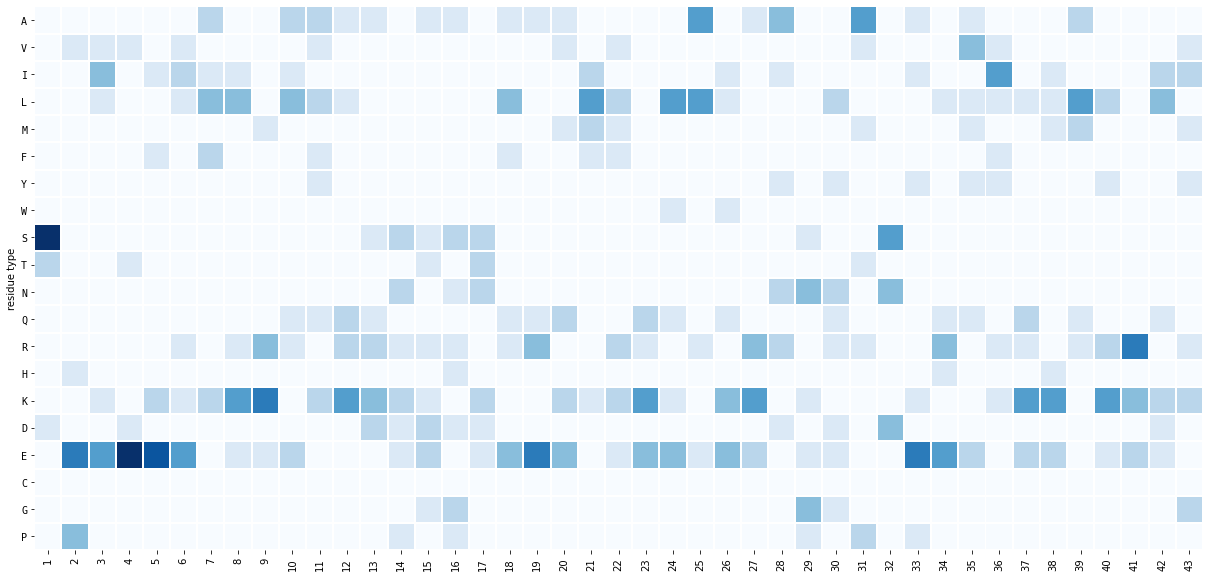

In [39]:
from rstoolbox.plot import sequence_frequency_plot
fig = plt.figure(figsize=(25, 10))
ax = plt.subplot2grid((1, 1), (0, 0))
sequence_frequency_plot(df_mut, "A", ax, refseq=False, cbar=False, xrotation=90)

**突变位点相似性绘图**: 比较每个位置突变与wildtype的相似，参考BLOSUM62矩阵。

In [40]:
from rstoolbox.analysis import positional_sequence_similarity
positional_sequence_similarity(df_mut.iloc[1:], 'A')

,identity_perc,positive_perc
1,0.666667,0.888889
2,0.000000,0.000000
3,0.222222,0.444444
4,0.666667,0.777778
5,0.555556,0.777778
6,0.111111,0.333333
7,0.111111,0.111111
8,0.333333,0.555556
9,0.000000,0.555556
10,0.222222,0.333333


**高亮突变发生位置的丑图**

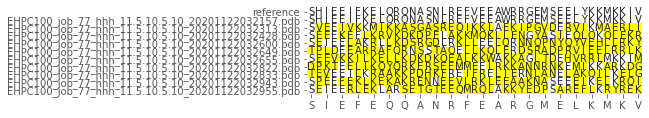

In [56]:
from rstoolbox.plot import plot_alignment
ax = plt.subplot2grid((1, 1), (0, 0))
plot_alignment(df, 'A', ax)

### 2. 序列相似性分析
参考: http://jaumebonet.cat/RosettaSilentToolbox/generated/rstoolbox.analysis.sequence_similarity.html#rstoolbox.analysis.sequence_similarity

In [42]:
from rstoolbox.analysis import sequence_similarity

# 根据rules进行读取:
# 定义description, description是一个字典格式;
rules = {'scores': ['score', 'fa_atr', 'description'], 'sequence': 'A'}

# 根据rules进行读取:
silent_file = './data/design_result.silent'
df = parse_rosetta_file(silent_file, rules)

# 添加野生型序列
wildtype_seq = 'SHIEEIFKELQRQNASNLREFVEEAWRRGEMSEELYKKMKKIV'
df.add_reference_sequence('A', wildtype_seq)

sequence_similarity(df.iloc[1:], 'A')

,score,fa_atr,description,sequence_A,blosum62_A_raw,blosum62_A_identity,blosum62_A_positive,blosum62_A_negative,blosum62_A_ali,blosum62_A_per_res,blosum62_A_perc
0,-111.579,-239.381,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,SVEEIVKKMIKKASGASREQIKKLAEKIPGVDERVIKMAERLI,19,6,22,21,S..E.+.K.+++.+.++..+..+.A.+...+.E.+.K..++++,"[4, -3, -3, 5, -3, 3, -3, 5, -2, 2, 1, 2, -1, 1, 0, 1, 1, -2, 0, 2, 0, -2, 1, -3, 4, -3, 2, -3, -2, -2, 1, 0, 5, 0, 1, -1, 5, -1, -1, 1, 2, 2, 3]",0.087156
1,-107.145,-245.738,EHPC100_job_77_hhh_11.5.10.5.10_20201122032428.pdb,SEEEKEFLKRVKDKDPELAKKMQKLLENGYASIEQLQKQLEKR,11,8,17,26,S..E+.F.+..+.....L.+.+++....G..S.E..+K..+..,"[4, 0, -3, 5, 1, -3, 6, -2, 1, -2, -2, 2, 0, 0, -2, -1, 0, 4, -1, 1, -3, 1, 2, 1, -1, -2, 0, 0, 6, -2, -1, 4, -3, 5, -2, -1, 1, 5, 0, -2, 1, -3, -3]",0.050459
2,-116.810,-243.867,EHPC100_job_77_hhh_11.5.10.5.10_20201122032600.pdb,SEIEELAKRLLKDSRGDLRKLLEELQRNNQPNYQYVEHLLRKY,48,11,23,20,S.IEE+.K.L.+.+..+LR+.+EE..R..+.+.+..+.+.+..,"[4, 0, 4, 5, 5, 2, -2, 5, 0, 4, -2, 2, 0, 1, -1, 0, 1, 4, 5, 1, 0, 1, 5, 5, -1, -2, 5, 0, 0, 2, -2, 1, -2, 2, -1, -1, 1, -1, 2, -2, 2, -3, -1]",0.220183
3,-121.064,-244.426,EHPC100_job_77_hhh_11.5.10.5.10_20201122032649.pdb,TPLDEEARRAFQRNSSTAQELLKQLERDSRADPRVIEELRRLK,28,5,23,20,+.++E..+...++N+S..+E.+++..R.......+.++++++.,"[1, -2, 2, 2, 5, -3, -2, 2, 0, -1, -3, 1, 1, 6, 1, 4, 0, -1, 1, 5, 0, 1, 1, 2, -1, -3, 5, -2, 0, 0, -1, 0, -1, 0, 1, -1, 1, 1, 2, 2, 2, 2, -2]",0.128440
4,-118.053,-246.797,EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,SEEVKKILKELLKDKDKQEALKKWAKKAGLTDEHVRRLMKKIM,11,8,17,26,S...+...+...++........+.A.+.G...E.+.+.MKKI+,"[4, 0, -3, -2, 1, -3, 0, -2, 1, -3, -2, -2, 1, 1, -1, 0, 0, -2, 0, -1, 0, -2, 1, -3, 4, -3, 2, -1, 6, -3, -1, 0, 5, 0, 1, -2, 2, -2, 5, 5, 5, 4, 1]",0.050459
5,-104.212,-233.769,EHPC100_job_77_hhh_11.5.10.5.10_20201122032822.pdb,DPKTEELIKQYQRKERSEEMMEELRKKANNRNKEMIKKARKDG,1,6,15,28,....E...+..++...+.....E...+....++E+.KK.+K..,"[0, -2, -3, -1, 5, -3, 0, -3, 1, -2, -1, 1, 1, 0, -1, -1, 1, -3, 0, -2, 0, -2, 5, -3, -1, -3, 2, -1, 0, 0, -1, 1, 1, 5, 2, -1, 5, 5, -1, 2, 5, -3, -3]",0.004587
6,-111.605,-241.044,EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb,TEVEEILKRAAKKPDHKFREIFRELIERNLANELAKQILKELG,35,10,19,24,+.+EEI.K...++.....RE...E...R...+E...+.+K++.,"[1, 0, 3, 5, 5, 4, 0, 5, 0, -1, -1, 2, 1, -2, -2, -1, 0, 0, 5, 5, 0, -1, 0, 5, -1, -3, 0, 5, 0, -3, -1, 1, 5, -3, -1, -2, 1, -3, 2, 5, 1, 2, -3]",0.160550
7,-114.042,-232.848,EHPC100_job_77_hhh_11.5.10.5.10_20201122032943.pdb,SPEEFEKLKEKAKRENNEEVLRKLEEAAKNASEEEIKELKRQI,4,8,17,26,S..E....+.+.+..+N.....+........SEE..K++K+.+,"[4, -2, -3, 5, -3, -3, -3, -2, 1, -3, 1, -1, 1, 0, -1, 1, 6, -3, 0, -2, 0, -3, 1, -3, -1, -3, -1, -1, -2, 0, -1, 4, 5, 5, -3, -1, 5, 1, 2, 5, 2, -3, 3]",0.018349
8,-99.049,-240.205,EHPC100_job_77_hhh_11.5.10.5.10_20201122032955.pdb,SEIEERLEKLARSETGTEEQMRQLAKKYEDPSAREFLKRYREK,19,9,17,26,S.IEE..++L.R.......+..+.A.+..+.S...+.K..+..,"[4, 0, 4, 5, 5, -3, 0, 1, 1, 4, -1, 5, 0, 0, 0, 0, 0, -3, 0, 2, 0, -3, 2, -3, 4, -3, 2, -2, -2, 2, -2, 4, -1, 0, -3, 3, -2, 5, -1, -2, 2, -3, -2]",0.087156


结果解读:
- blosum62_A_identity: 代表Total identity matches。
- blosum62_A_perc: 代表相似性得分

### 3. 序列的距离矩阵
该矩阵可以后续用于聚类分析，挑选序列等操作。

In [63]:
# 根据rules进行读取:
# 定义description, description是一个字典格式;
rules = {'sequence': 'A'}

# 根据rules进行读取:
silent_file = './data/design_result.silent'
df = parse_rosetta_file(silent_file, rules)

# 产生距离矩阵
df.sequence_distance('A')

,EHPC100_job_77_hhh_11.5.10.5.10_20201122032157.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032428.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032600.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032649.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032822.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032943.pdb,EHPC100_job_77_hhh_11.5.10.5.10_20201122032955.pdb
EHPC100_job_77_hhh_11.5.10.5.10_20201122032157.pdb,0,37,35,32,38,35,37,33,35,34
EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,37,0,39,37,35,33,36,37,29,34
EHPC100_job_77_hhh_11.5.10.5.10_20201122032428.pdb,35,39,0,32,40,36,38,34,34,36
EHPC100_job_77_hhh_11.5.10.5.10_20201122032600.pdb,32,37,32,0,33,39,39,31,38,34
EHPC100_job_77_hhh_11.5.10.5.10_20201122032649.pdb,38,35,40,33,0,39,36,34,33,38
EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,35,33,36,39,39,0,37,37,31,36
EHPC100_job_77_hhh_11.5.10.5.10_20201122032822.pdb,37,36,38,39,36,37,0,38,31,33
EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb,33,37,34,31,34,37,38,0,37,38
EHPC100_job_77_hhh_11.5.10.5.10_20201122032943.pdb,35,29,34,38,33,31,31,37,0,33
EHPC100_job_77_hhh_11.5.10.5.10_20201122032955.pdb,34,34,36,34,38,36,33,38,33,0
